In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set();

Создание dataframe из csv-файла и вывод первых строк

In [32]:
data = pd.read_csv('vmCloud_data.csv')
data.head()

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:54,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,2023-01-26 04:46:34,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,2023-01-13 23:39:47,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed
3,e672e32f-c134-4fbc-992b-34eb63bef6bf,2023-02-09 11:45:49,54.488318,88.100960,NaN,195.639954,5876.0,16.456670,0.529511,compute,high,completed
4,f38b8b50-6926-4533-be4f-89ad11624071,2023-06-14 08:27:26,42.365480,NaN,NaN,359.451537,3361.0,55.307992,0.351907,NaN,medium,waiting


Создание dataframe, который содержит только нужные столбцы

In [33]:
df = pd.DataFrame({
    "timestamp": pd.to_datetime(data["timestamp"]),
    "cpu": pd.to_numeric(data["cpu_usage"]),
    "memory": pd.to_numeric(data["memory_usage"]),
    "network": pd.to_numeric(data["network_traffic"])
})

Отбрасывание данных без временной метки и установка времени в качестве индекса

In [34]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp', ascending=True, inplace=True)
df.dropna(subset=['timestamp'], inplace=True)
df.set_index('timestamp', inplace=True)
df.head()

,cpu,memory,network
timestamp,,,
2023-01-01 00:00:09,63.282078,NaN,212.708467
2023-01-01 00:00:15,30.719806,89.199261,604.263594
2023-01-01 00:00:31,14.019569,74.367251,600.520958
2023-01-01 00:00:36,93.148608,68.979072,621.709971
2023-01-01 00:00:40,99.077509,71.444353,760.884810


In [35]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1799334 entries, 2023-01-01 00:00:09 to 2023-07-20 12:04:18
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   cpu      1620101 non-null  float64
 1   memory   1618961 non-null  float64
 2   network  1619937 non-null  float64
dtypes: float64(3)
memory usage: 54.9 MB


Переход к равным временным промежуткам. Новые значения вычисляются как среднее от всех значений, которые входили в заданный промежуток.

In [36]:
df = df.resample('15min').mean()
df.head()

,cpu,memory,network
timestamp,,,
2023-01-01 00:00:00,54.523473,53.238890,458.295518
2023-01-01 00:15:00,47.470728,49.747014,479.838752
2023-01-01 00:30:00,46.456867,48.135173,541.111879
2023-01-01 00:45:00,49.810376,48.210993,472.659854
2023-01-01 01:00:00,45.592364,47.621662,474.079254


При переходе к равным временным промежуткам объем данных уменьшился и пропуски в данных исчезли

In [37]:
df.ffill(inplace=True)
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19249 entries, 2023-01-01 00:00:00 to 2023-07-20 12:00:00
Freq: 15min
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cpu      19249 non-null  float64
 1   memory   19249 non-null  float64
 2   network  19249 non-null  float64
dtypes: float64(3)
memory usage: 601.5 KB


Вывод информации о столбцах

In [38]:
df.describe()

,cpu,memory,network
count,19249.000000,19249.000000,19249.000000
mean,50.006576,49.986690,499.943701
std,3.161468,3.179664,31.607110
min,37.943184,38.407899,381.820576
25%,47.893493,47.838711,478.787626
50%,50.010299,49.985039,499.924003
75%,52.112425,52.131006,521.377944
max,62.933881,65.752877,622.280112


Гистограммы соответствуют нормальному распределению

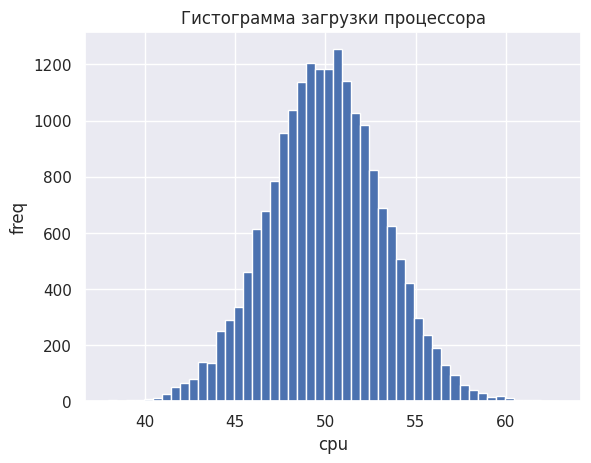

In [39]:
plt.hist(df['cpu'], bins=50)
plt.xlabel('cpu')
plt.ylabel('freq')
plt.title('Гистограмма загрузки процессора')
plt.show()

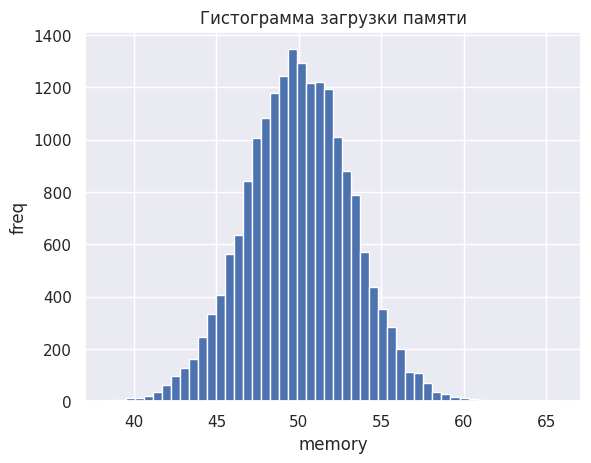

In [40]:
plt.hist(df['memory'], bins=50)
plt.xlabel('memory')
plt.ylabel('freq')
plt.title('Гистограмма загрузки памяти')
plt.show()

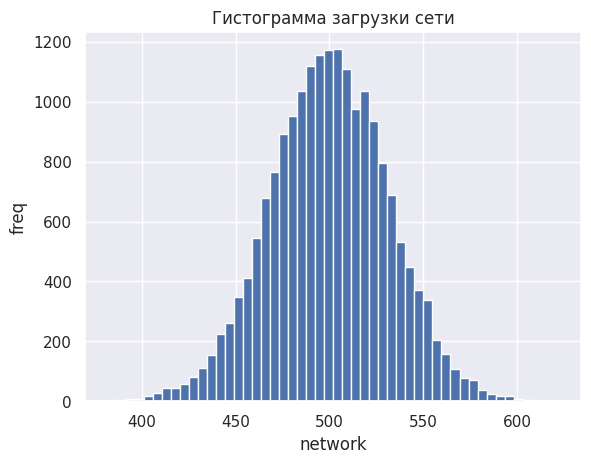

In [41]:
plt.hist(df['network'], bins=50)
plt.xlabel('network')
plt.ylabel('freq')
plt.title('Гистограмма загрузки сети')
plt.show()

Визуализация временных рядов:

In [42]:
rows = 24 * 4 * 3 # количество 15 минутных отрезков за 3 дня 
tail = df.tail(rows)

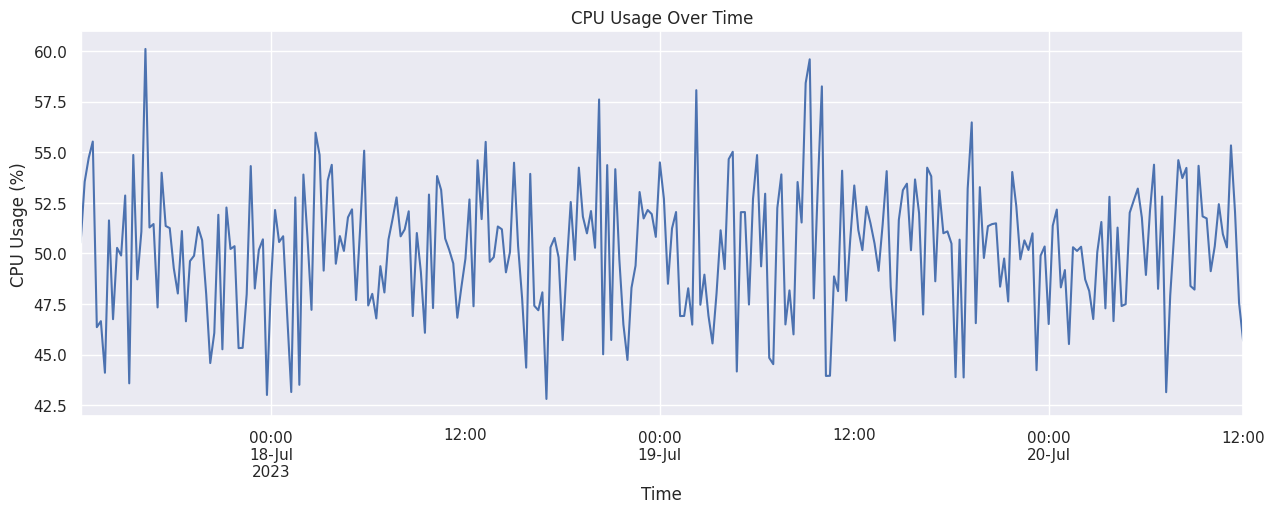

In [43]:
tail['cpu'].plot(figsize=(15, 5), title='CPU Usage Over Time')
plt.xlabel('Time')
plt.ylabel('CPU Usage (%)')
plt.show()

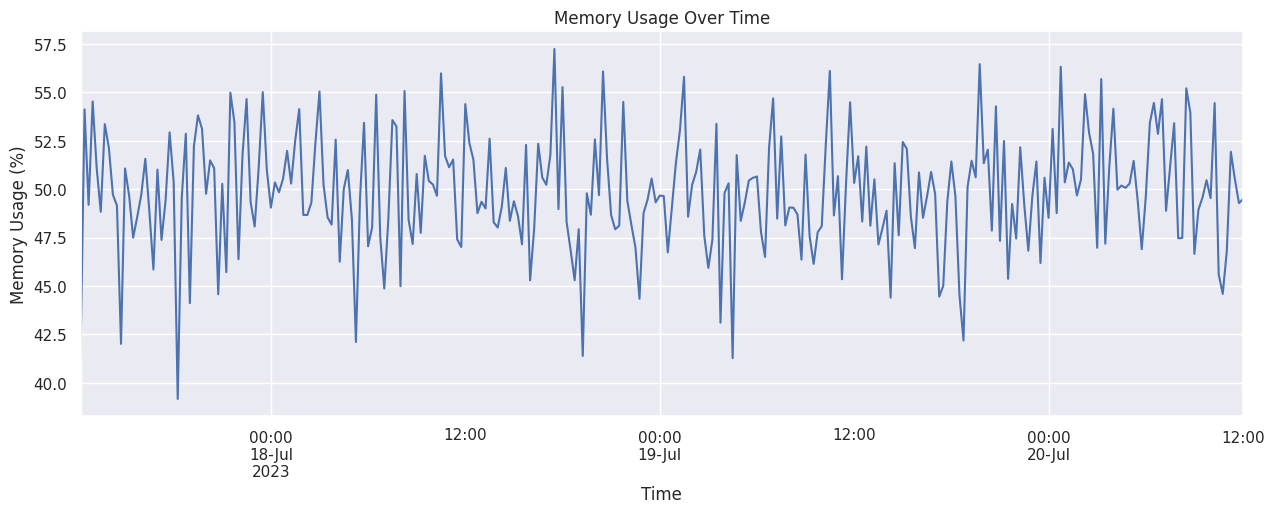

In [44]:
tail['memory'].plot(figsize=(15, 5), title='Memory Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Memory Usage (%)')
plt.show()

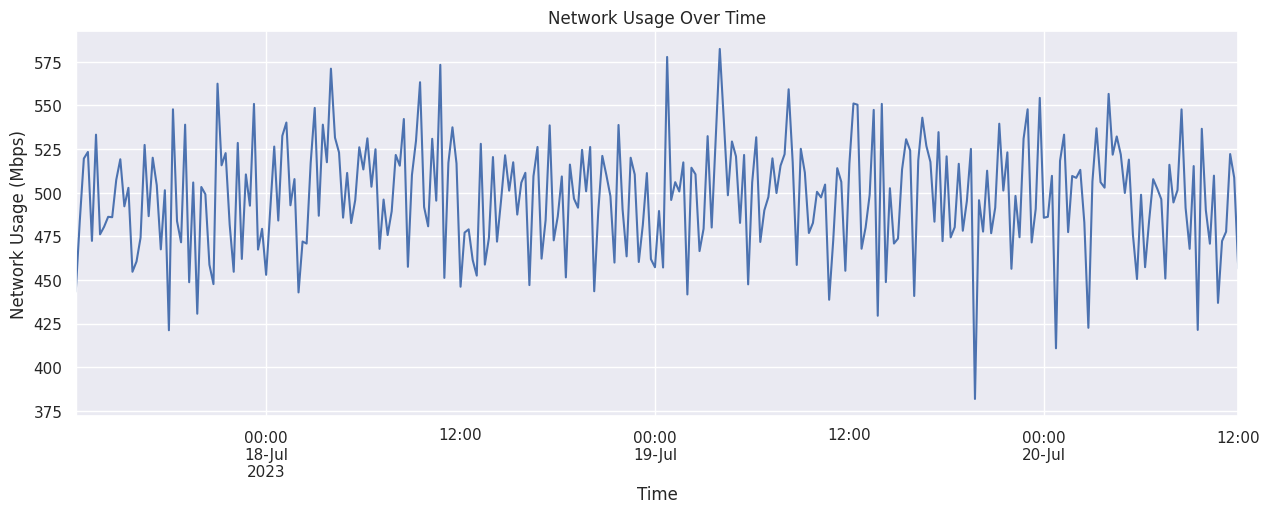

In [45]:
tail['network'].plot(figsize=(15, 5), title='Network Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Network Usage (Mbps)')
plt.show()

Анализ выбросов:

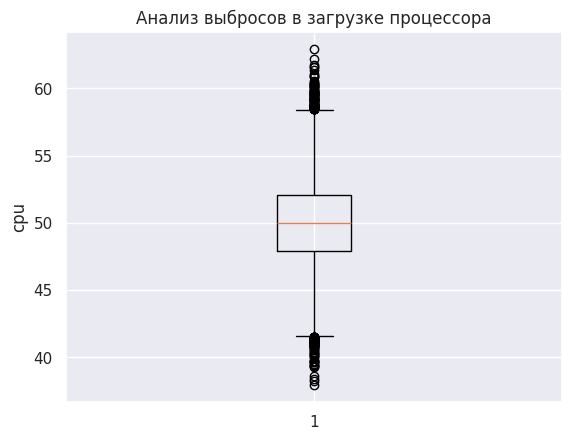

In [46]:
plt.boxplot(df['cpu'])
plt.ylabel('cpu')
plt.title('Анализ выбросов в загрузке процессора')
plt.show()

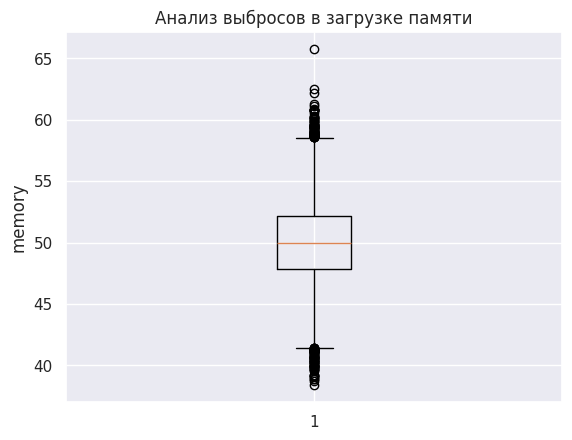

In [47]:
plt.boxplot(df['memory'])
plt.ylabel('memory')
plt.title('Анализ выбросов в загрузке памяти')
plt.show()

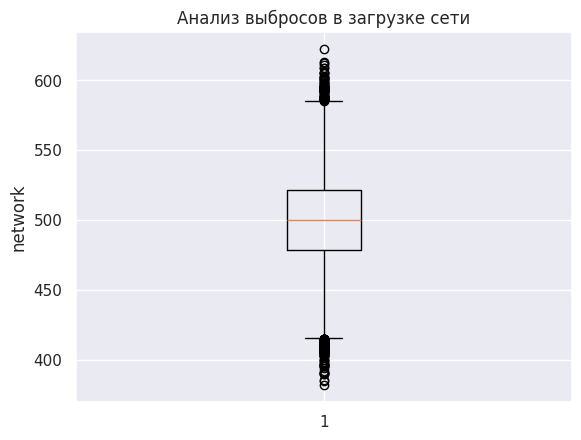

In [48]:
plt.boxplot(df['network'])
plt.ylabel('network')
plt.title('Анализ выбросов в загрузке сети')
plt.show()

Устранение выбросов:

In [49]:
def replace_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    replaced_series = series.copy()
    for i in range(len(series)):
        if series.iloc[i] < lower_bound or series.iloc[i] > upper_bound:
            if i == 0:  # Если первый элемент
                replaced_series.iloc[i] = series.iloc[i+1]
            elif i == len(series) - 1:  # Если последний элемент
                replaced_series.iloc[i] = series.iloc[i-1]
            else:  # Для всех остальных
                replaced_series.iloc[i] = np.median([series.iloc[i-1], series.iloc[i+1]])
    return replaced_series

# Применение функции ко всем метрикам
df['cpu'] = replace_outliers(df['cpu'])
df['memory'] = replace_outliers(df['memory'])
df['network'] = replace_outliers(df['network'])

Диаграммы рассеяния:

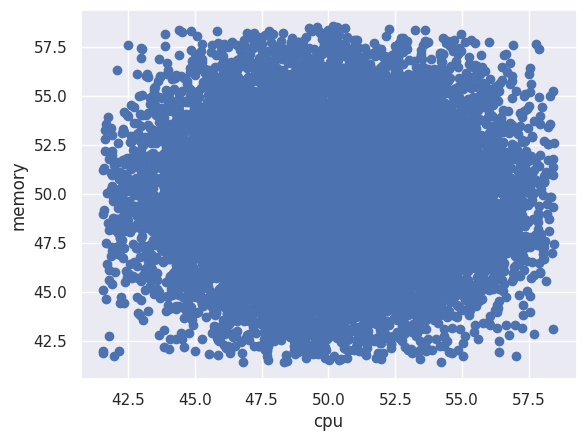

In [50]:
plt.scatter(df['cpu'], df['memory'])
plt.xlabel('cpu')
plt.ylabel('memory')
plt.show()

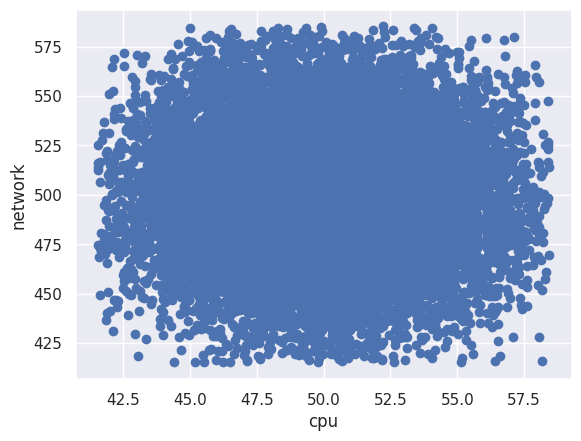

In [51]:
plt.scatter(df['cpu'], df['network'])
plt.xlabel('cpu')
plt.ylabel('network')
plt.show()

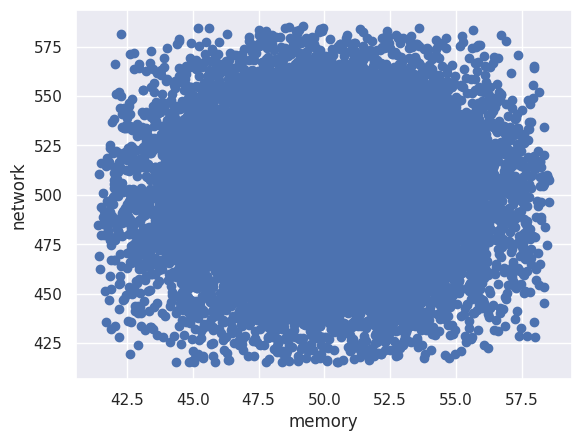

In [52]:
plt.scatter(df['memory'], df['network'])
plt.xlabel('memory')
plt.ylabel('network')
plt.show()

Создание дополнительных признаков

In [53]:

def create_features(data, lags):
    def add_features(df, feature):
        df[f'{feature}_roll_mean'] = df[feature].shift(1).rolling(window=5).mean()
        df[f'{feature}_roll_std'] = df[feature].shift(1).rolling(window=5).std()
        df[f'{feature}_pct_change'] = df[feature].shift(1).pct_change()
        return df

    df = data.copy()
    # Создание дополнительных признаков из временных меток
    df['day_of_week'] = df.index.dayofweek
    df['hour'] = df.index.hour

    # Создание скользящих средних, скользящих стандартных отклонений и процентных изменений предыдущих значений
    add_features(df, 'cpu')
    add_features(df, 'memory')
    add_features(df, 'network')

    # Создание лаговых признаков
    for lag in range(1, lags + 1):
        df[f'cpu_lag_{lag}'] = df['cpu'].shift(lag)
        df[f'memory_lag_{lag}'] = df['memory'].shift(lag)
        df[f'network_lag_{lag}'] = df['network'].shift(lag)

    # Заполнение пропущенных значений, которые появились из-за создания лагов и скользящих средних
    df.ffill(inplace=True)
    df.dropna(inplace=True)
    return df


In [54]:
df = create_features(df,8)

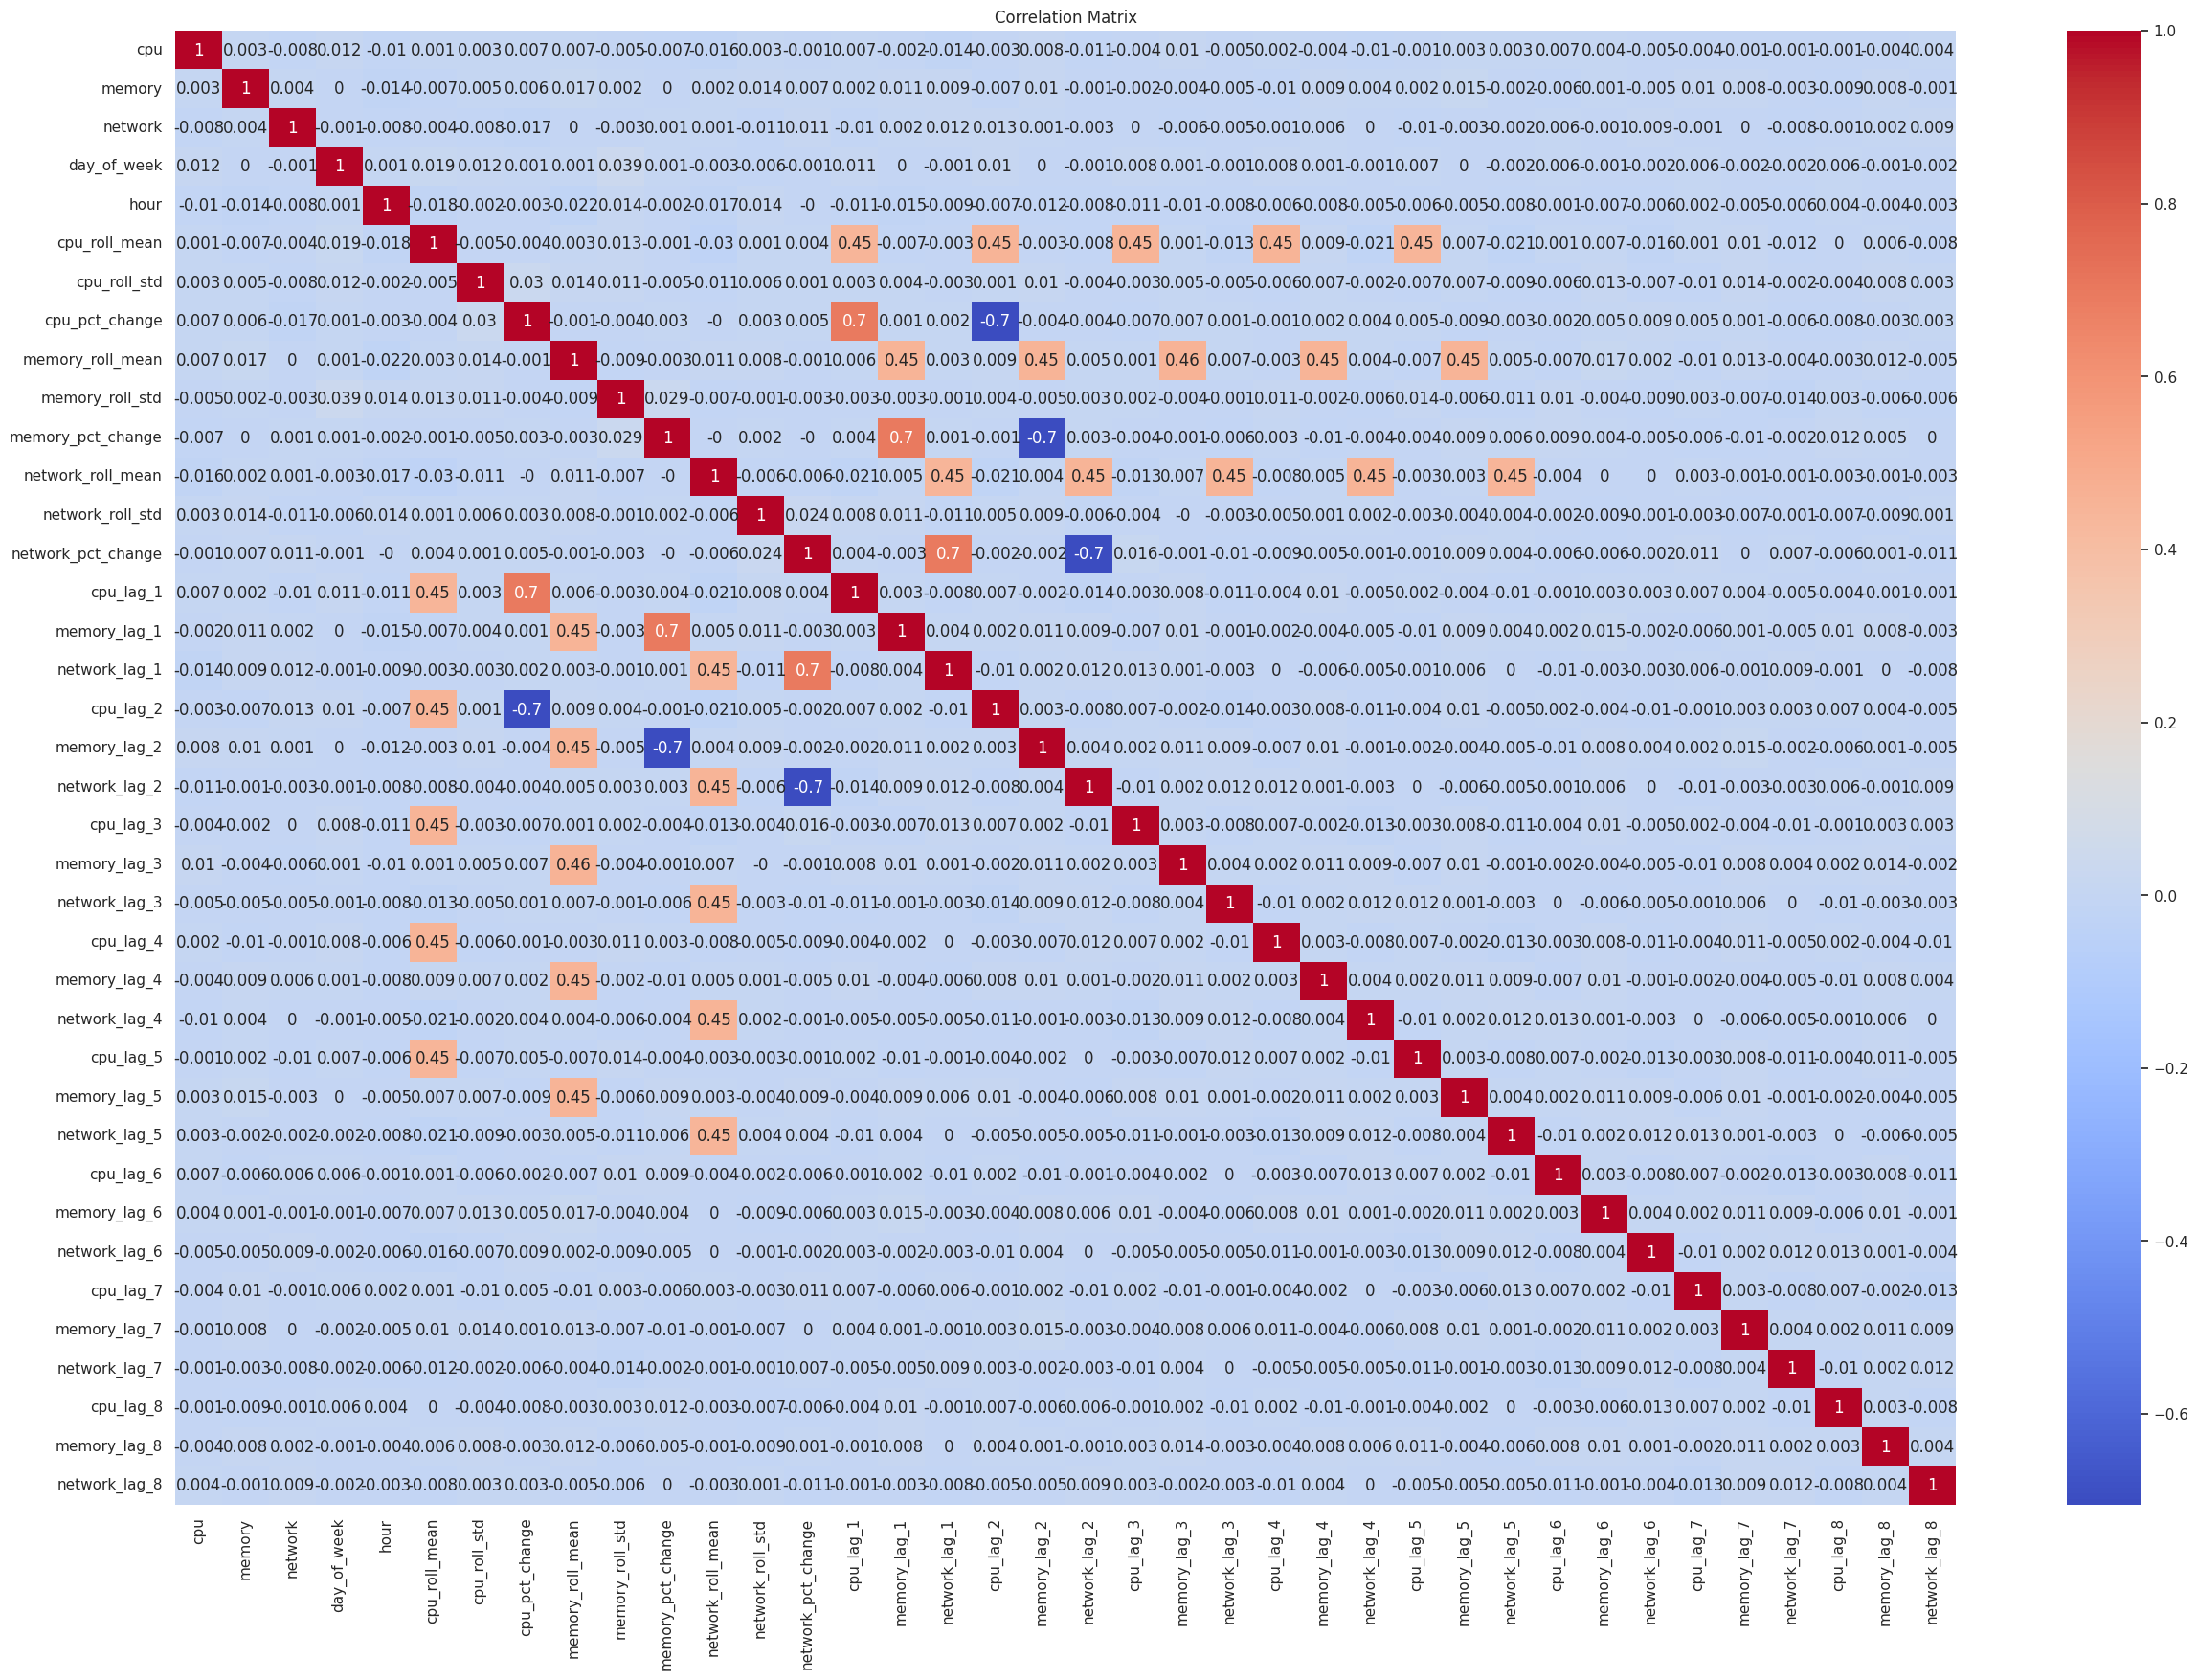

In [55]:
# Корреляционная матрица
corr_matrix = df.corr().round(decimals=3)

# Тепловая карта корреляции
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [56]:
# Задание параметров модели LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 200,
    'learning_rate': 0.3,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
}

In [57]:
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Обучение и оценка модели для каждой цели
def train_and_evaluate(params, X_train, X_test, y_train, y_test):
    categorical_feature=['hour','day_of_week']
    train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_feature)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, categorical_feature=categorical_feature)

    num_round = 1000
    # , callbacks=[lgb.early_stopping(stopping_rounds=20)]
    bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], keep_training_booster=True)
    y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = calculate_mape(y_test, y_pred)
    
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")

    data_points = 50
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[-data_points:].index, y_test[-data_points:], label='Actual')
    plt.plot(y_test[-data_points:].index, y_pred[-data_points:], label='Predicted')
    plt.title('Actual vs Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    return bst

In [59]:
X = df.drop(columns=['cpu', 'memory', 'network'])
y_cpu = df['cpu']
y_memory = df['memory']
y_network = df['network']


CPU Model
MSE: 12.006570849440322
RMSE: 3.465049905764753
MAE: 2.780838892468158
MAPE: 5.606530481526226


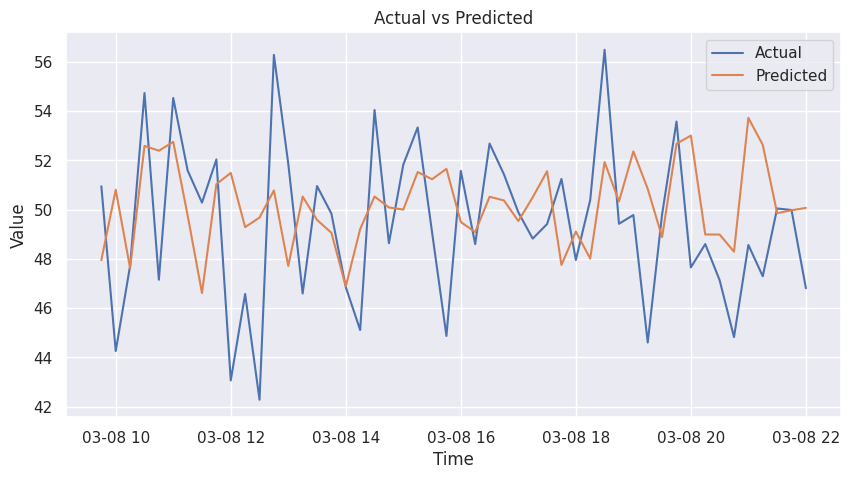

Memory Model
MSE: 12.171703425308943
RMSE: 3.4887968449465414
MAE: 2.790766360822681
MAPE: 5.622870314283763


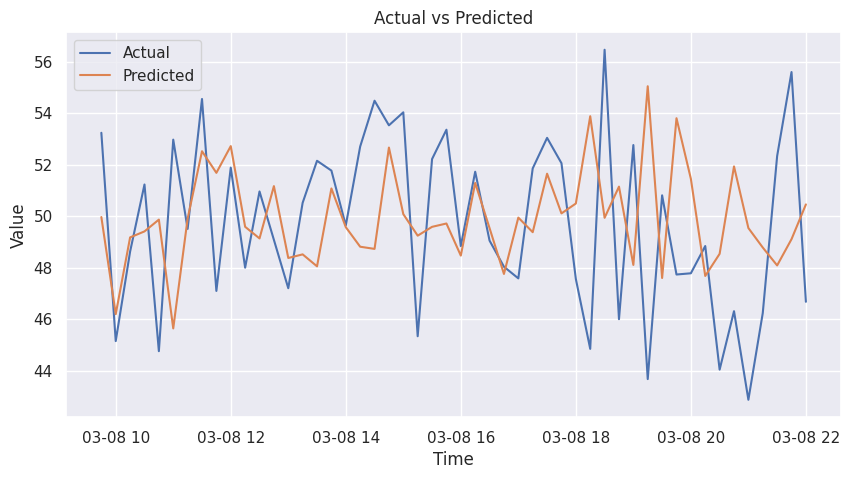

Network Model
MSE: 1211.762488627179
RMSE: 34.81037903595965
MAE: 27.798292130368218
MAPE: 5.60409451825415


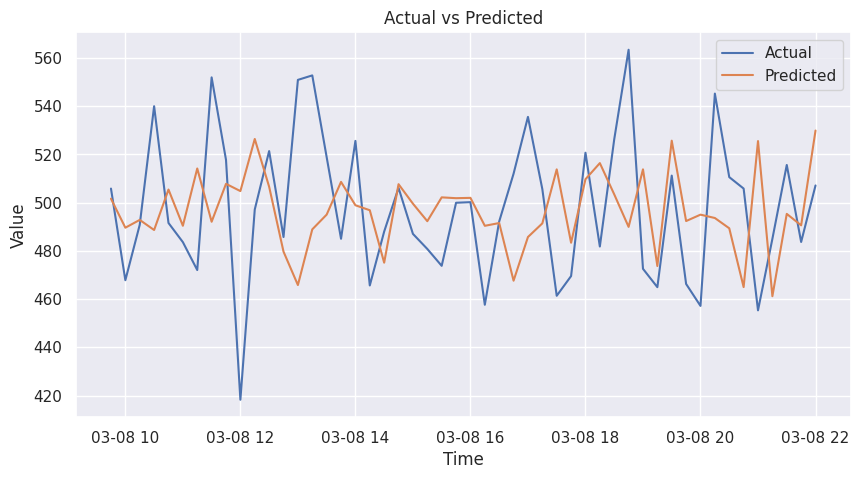

CPU Model
MSE: 11.845242762997652
RMSE: 3.4416918460253894
MAE: 2.768597743327249
MAPE: 5.578074535142713


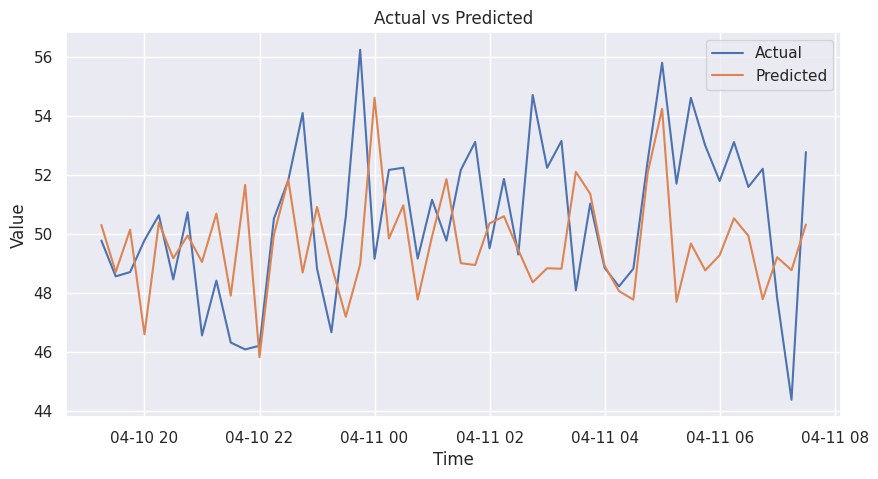

Memory Model
MSE: 12.00928292603821
RMSE: 3.4654412310755194
MAE: 2.770485174701042
MAPE: 5.582097371931722


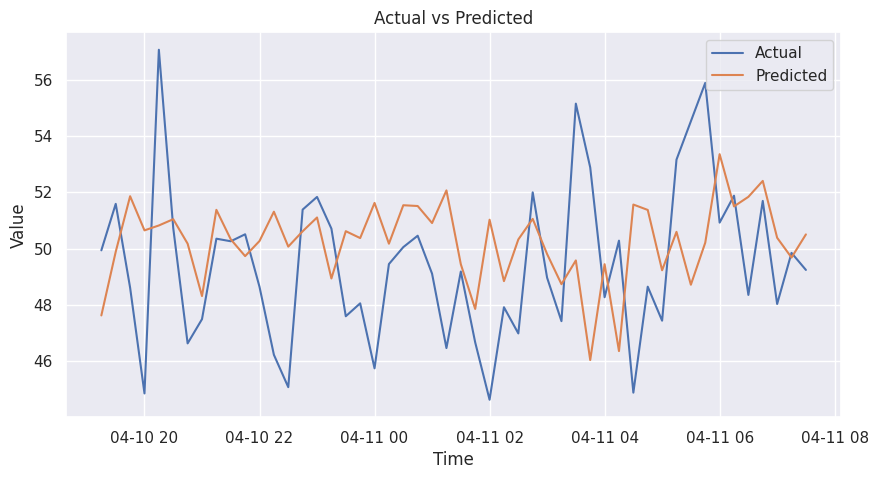

Network Model
MSE: 1173.3815742838963
RMSE: 34.25465770203953
MAE: 27.482545351376157
MAPE: 5.5249898066256


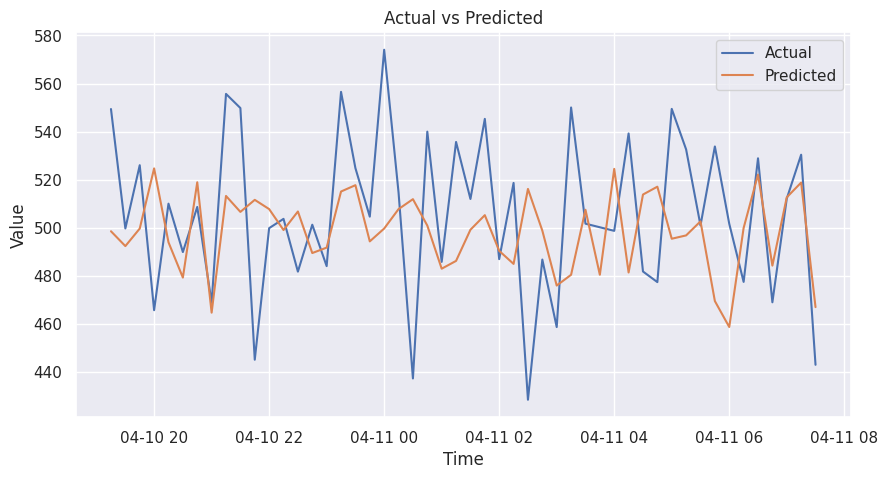

CPU Model
MSE: 11.642774952997515
RMSE: 3.412151074175573
MAE: 2.727705947729911
MAPE: 5.481000699216735


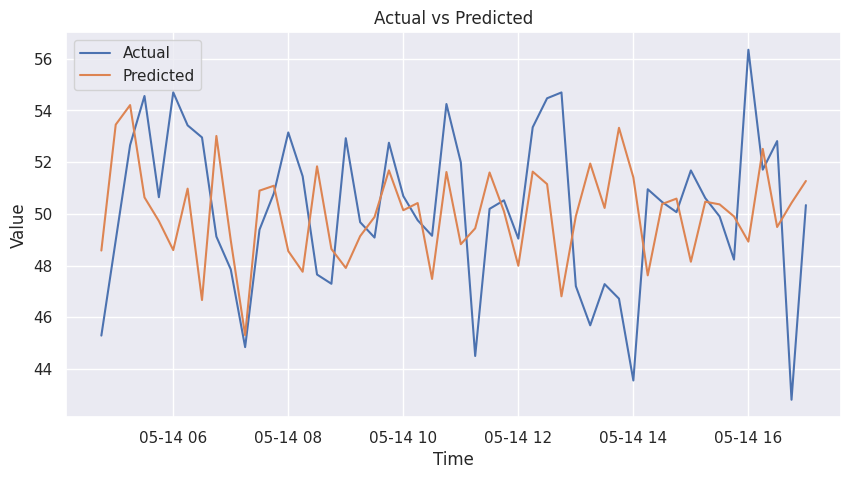

Memory Model
MSE: 12.100671586722545
RMSE: 3.478601958649846
MAE: 2.773961541865987
MAPE: 5.583503270791384


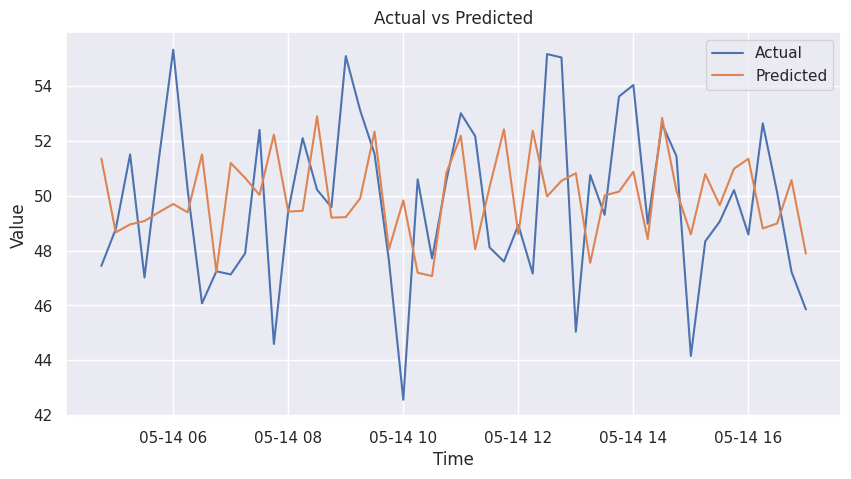

Network Model
MSE: 1191.6229676066343
RMSE: 34.519892346394045
MAE: 27.656961495321035
MAPE: 5.557261683188435


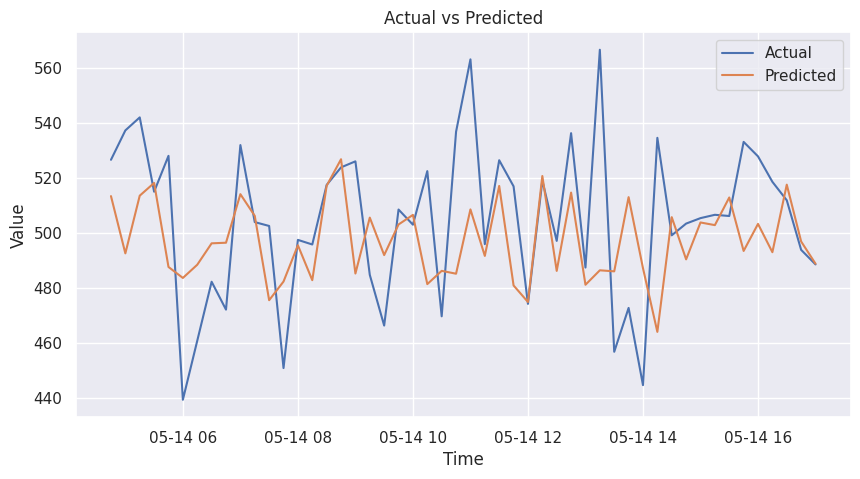

CPU Model
MSE: 11.546313970785038
RMSE: 3.397986752591163
MAE: 2.732627959414061
MAPE: 5.497515002930124


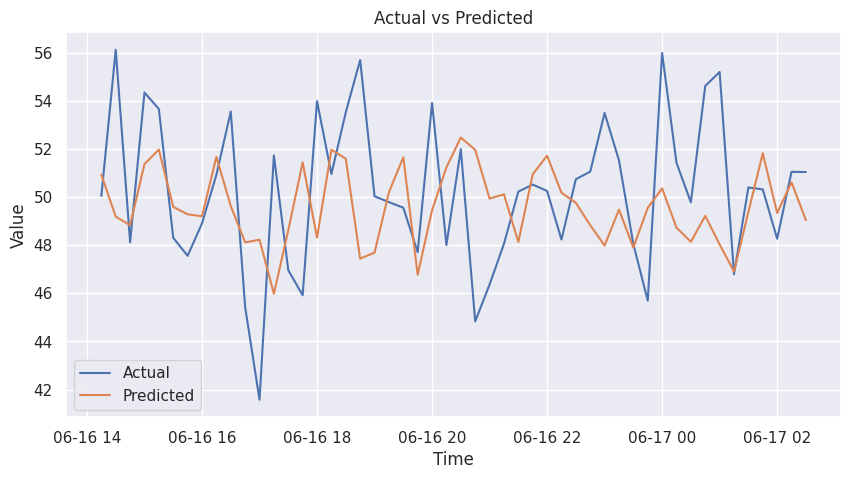

Memory Model
MSE: 12.089663529409926
RMSE: 3.4770193455616445
MAE: 2.7908506199365086
MAPE: 5.61392310217454


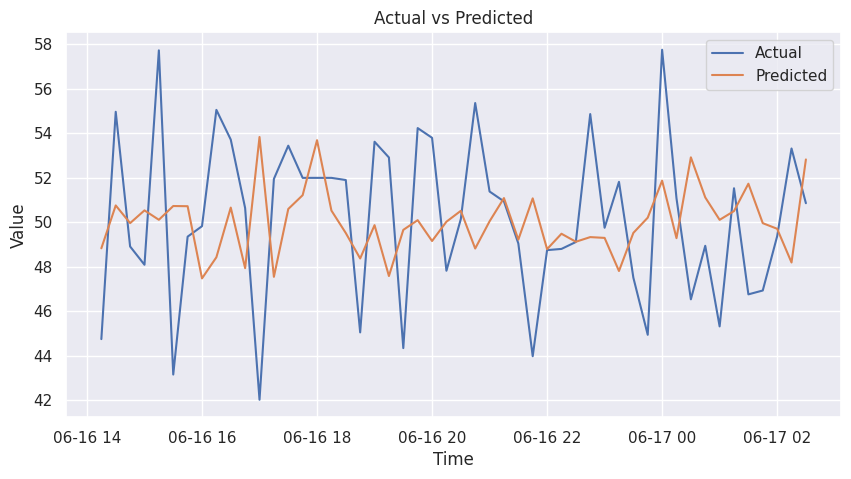

Network Model
MSE: 1184.4827225031142
RMSE: 34.416314772257564
MAE: 27.59118271823653
MAPE: 5.571490987760909


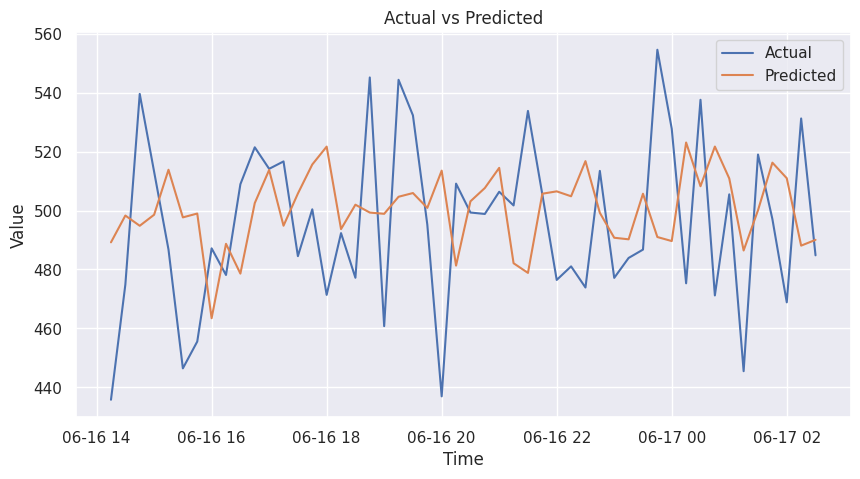

CPU Model
MSE: 11.547963097575561
RMSE: 3.39822940626079
MAE: 2.7221043600313815
MAPE: 5.481098209898798


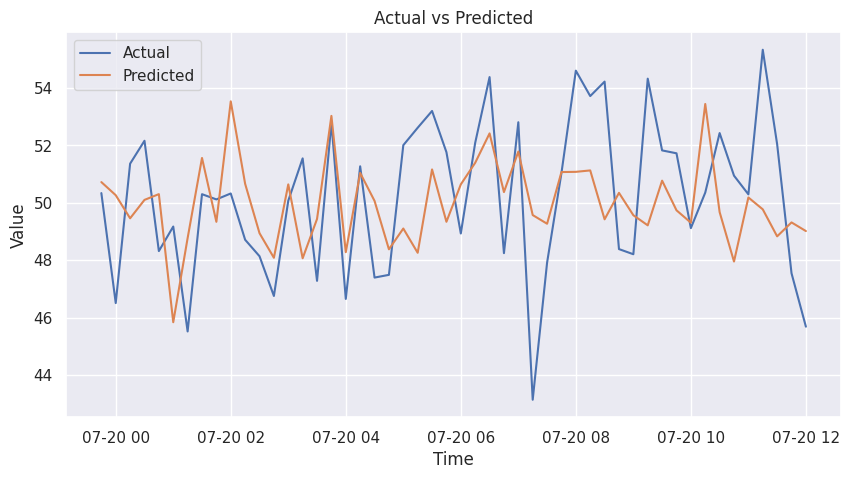

Memory Model
MSE: 11.977521005249525
RMSE: 3.460855530826088
MAE: 2.7664894654687413
MAPE: 5.548840643014768


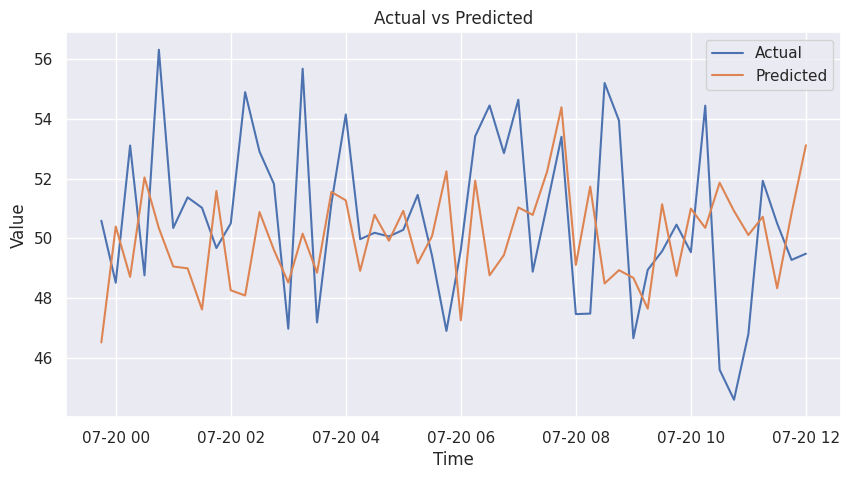

Network Model
MSE: 1087.60312203215
RMSE: 32.97882839083508
MAE: 26.237253000891364
MAPE: 5.276452000530272


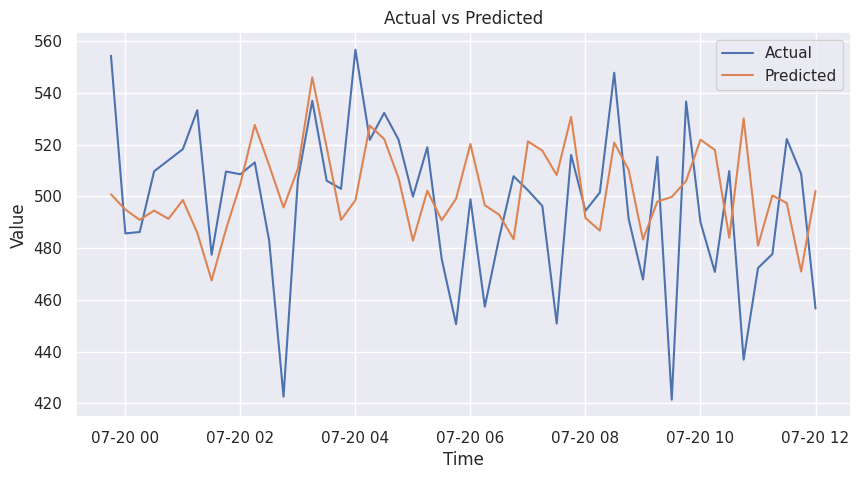

In [60]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_cpu_train, y_cpu_test = y_cpu.iloc[train_index], y_cpu.iloc[test_index]
    y_memory_train, y_memory_test = y_memory.iloc[train_index], y_memory.iloc[test_index]
    y_network_train, y_network_test = y_network.iloc[train_index], y_network.iloc[test_index]

    # Обучение и оценка модели для CPU
    print("CPU Model")
    bst_cpu = train_and_evaluate(params, X_train, X_test, y_cpu_train, y_cpu_test)

    # Обучение и оценка модели для Memory
    print("Memory Model")
    bst_memory = train_and_evaluate(params, X_train, X_test, y_memory_train, y_memory_test)

    # Обучение и оценка модели для Network
    print("Network Model")
    bst_network = train_and_evaluate(params, X_train, X_test, y_network_train, y_network_test)
